<h1 align='center'>Project 3</h1>

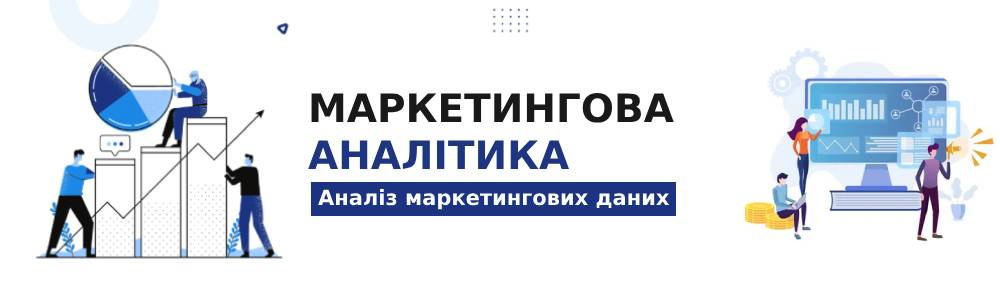

In [1]:
from IPython.display import Image, display
display(Image("/Users/olha/Downloads/m_analysis.jpg", width=1000, height=300))

### Посилання на дані:
<p>https://www.kaggle.com/datasets/jackdaoud/marketing-data/data</p>

### Задача:
- вивести графіки з інформацію про клієнтів ( рік народження, сімейний статус, кількість дітей, дохід)
- визначити які товари купують найчастіше
- скільки витрачає клієнт на кожну групу товару
- кількість покупок по групам клієнтів
- визначити яка кампанія буда найуспішнішою
- скільки клієнтів залучили через рекламні кампаніїї
- скільки покупок робить середньостатистичний клієнт
- визначити як впливає дохід клієнта на кількість покупок

### Назва та опис стовпців:
<ul>
    <li>ID: Унікальний ідентифікатор клієнта</li>
    <li>Year_Birth: Рік народження клієнта</li>
    <li>Education: Рівень освіти клієнта</li>
    <li>Marital_Status: Сімейний стан клієнта</li>
    <li>Income: Річний дохід сім'ї клієнта</li>
    <li>Kidhome: Кількість дітей в домогосподарстві клієнта</li>
    <li>Teenhome: Кількість підлітків в домогосподарстві клієнта</li>
    <li>Dt_Customer: Дата зарахування клієнта до компанії</li>
    <li>Recency: Кількість днів з моменту останньої покупки клієнта</li>
    <li>MntWines: Сума, витрачена на вино за останні 2 роки</li>
    <li>MntFruits: Сума, витрачена на фрукти за останні 2 роки</li>
    <li>MntMeatProducts: Сума, витрачена на м'ясні продукти за останні 2 роки</li>
    <li>MntFishProducts: Сума, витрачена на рибні продукти за останні 2 роки</li>
    <li>MntSweetProducts: Сума, витрачена на солодощі за останні 2 роки</li>
    <li>MntGoldProds: Сума, витрачена на золото за останні 2 роки</li>
    <li>NumDealsPurchase: Кількість покупок зі знижкою</li>
    <li>NumWebPurchase: Кількість покупок через веб-сайт компанії</li>
    <li>NumCatalogPurchase: Кількість покупок з використанням каталогу</li>
    <li>NumStorePurchase: Кількість покупок, зроблених безпосередньо в магазинах</li>
    <li>NumWebVisitsMonth: Кількість відвідувань веб-сайту компанії за останній місяць</li>
    <li>AcceptedCmp3: 1, якщо клієнт прийняв пропозицію у третьому кампанії, в іншому випадку - 0</li>
    <li>AcceptedCmp4: 1, якщо клієнт прийняв пропозицію у четвертій кампанії, в іншому випадку - 0</li>
    <li>AcceptedCmp5: 1, якщо клієнт прийняв пропозицію у п'ятій кампанії, в іншому випадку - 0</li>
    <li>AcceptedCmp1: 1, якщо клієнт прийняв пропозицію у першій кампанії, в іншому випадку - 0</li>
    <li>AcceptedCmp2: 1, якщо клієнт прийняв пропозицію у другій кампанії, в іншому випадку - 0</li>
    <li>Respones: 1, якщо клієнт прийняв пропозицію в останній кампанії, в іншому випадку - 0</li>
    <li>Complain: 1, якщо клієнт скаржився протягом останніх 2 років, в іншому випадку - 0</li>
    <li>Country: Місцезнаходження клієнта</li>
</ul>

### Завантаження бібліотек

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

### Налаштування даних та відключення попереджень

In [3]:
# відображення усіх даних в датафреймі
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# відключити попередження
import warnings
warnings.simplefilter("ignore")

### Завантаження файлу з даними

In [4]:
df = pd.read_csv("/Users/olha/Downloads/ml_project1_data.csv")

### Огляд отриманих даних

<p>Виведемо перші 5 рядків датафрейму та оглянемо дані</p>

In [5]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


### Переглянемо кількість отриманих даних

In [6]:
print("Датафрейм має: ", df.shape[0], "рядків та", df.shape[1], "стовпців.")

Датафрейм має:  2240 рядків та 29 стовпців.


### Перевіримо дані на дублікати

In [7]:
duplicates = df[df.duplicated()].shape[0]
print("Дублікати:")
print(duplicates)

Дублікати:
0


### Перевіримо дані на порожні значення

In [8]:
null_counts = df.isna().sum()
print("Кількість порожніх значень у кожному стовпчику:")
print(null_counts)

Кількість порожніх значень у кожному стовпчику:
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


### Оцінка унікальних значень

In [9]:
print(df.nunique())

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64


Стовпці Z_CostContact та Z_Revenue мають однакові повторювані значення. Ці стовпці не є важливими для аналізу, тому їх можна видалити.

### Загальні інформаці про дані та їх тип:

In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### Зведена статистика фрейму даних:

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


### Висновки про дані:
- У стовпця "Income" відсутні 24 значення
- У стовпця "Dt_Customer" тип даних -  рядок
- Дублікати відсутні
- Стовпці Z_CostContact та Z_Revenue мають однакові значення

## Підготовка датафрейму

In [12]:
# Зробимо копію даних для подальшої роботи з даними
df_copy = df.copy()

#### Перетворимо стовпець 'Dt_Customer' у тип datetime

In [13]:
df_copy['Dt_Customer'] = pd.to_datetime(df_copy['Dt_Customer'])

#### Перевіримо тип даних стовпця "Dt_Customer"

In [14]:
print(df_copy['Income'].info())

<class 'pandas.core.series.Series'>
RangeIndex: 2240 entries, 0 to 2239
Series name: Income
Non-Null Count  Dtype  
--------------  -----  
2216 non-null   float64
dtypes: float64(1)
memory usage: 17.6 KB
None


##### Результат: стовпець "Dt_Customer" має тип datetime

### Видалення стовпців з однаковими значеннями

In [15]:
df_copy.drop(columns=['Z_CostContact','Z_Revenue'],inplace=True)

##### Результат: стовпці "Z_CostContac" та "Z_Revenue" видалені

### Створимо сповпець "Total_Mnt"
Total_Mnt: Загальна сума, витрачена за останні два роки, яку можна отримати, підсумувавши всі стовпчики, пов'язані з "Mnt"

In [16]:
# Створення стовпця "Total_Mnt" як суми інших стовпців
df_copy['Total_Mnt'] = df_copy[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
df_copy.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Mnt
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,1617
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,27
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,776
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,53
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,422


### Обʼєднання 'Kidhome' та 'Teenhome'
Обʼєднаємо ці значення для отримання колонки з загальною кількістю дітей клієнта

In [17]:
df_copy['Total_Amount_of_Children']=df_copy['Kidhome']+df_copy['Teenhome']
df_copy.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Mnt,Total_Amount_of_Children
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,1617,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,27,2
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,776,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,53,1
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,422,1


### Переглянемо значення стовпця "Marital_Status"

In [18]:
print(df_copy['Marital_Status'].unique())

['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


Видалимо значення 'Absurd' та 'YOLO'

In [19]:
df_copy = df_copy[~df_copy['Marital_Status'].isin(['Absurd', 'YOLO'])]

Замінюємо значення "Alone" на "Single" у стовпці "Marital_Status" щоб об'єднати їх

In [20]:
df_copy['Marital_Status'] = df_copy['Marital_Status'].replace('Alone', 'Single')

## Перевірка викидів в даних

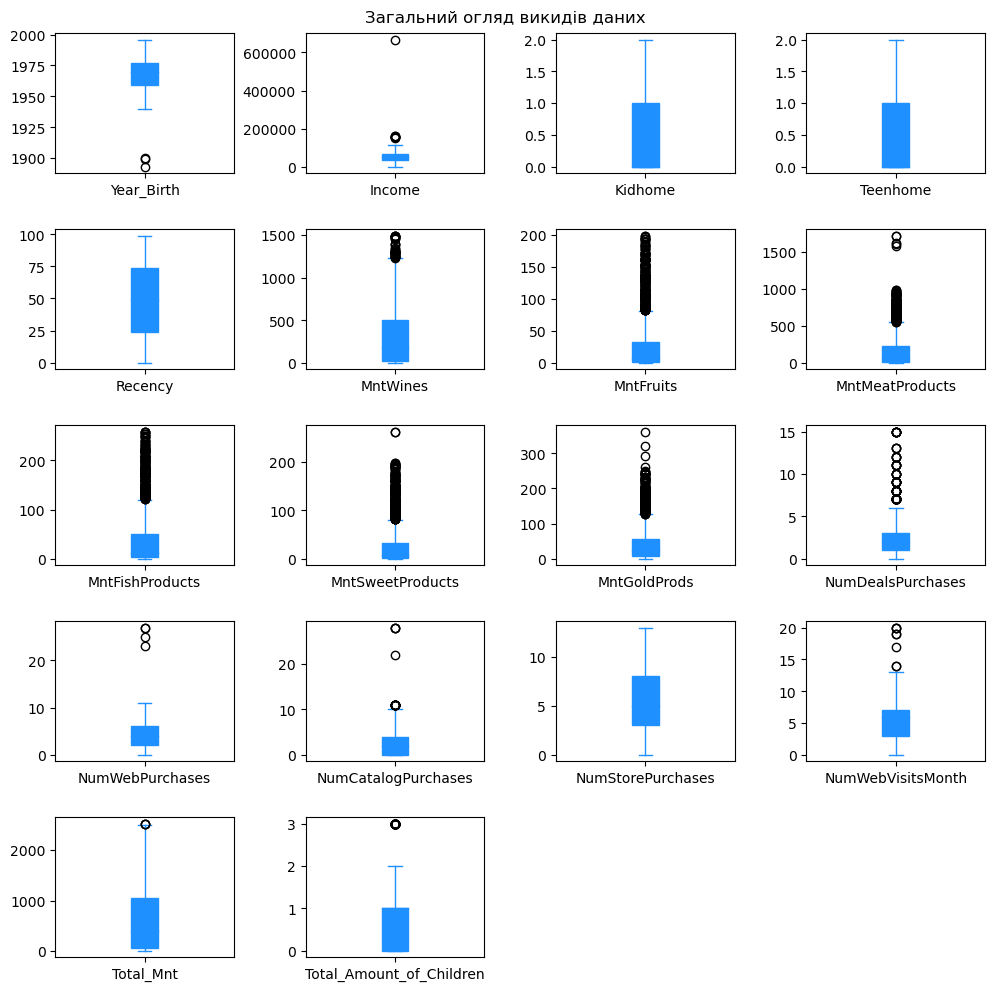

In [21]:
df_to_plot = df_copy.drop(columns=['ID', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain']).select_dtypes(include=np.number)
df_to_plot.plot(subplots=True, layout=(5,4), kind='box', figsize=(12,12), patch_artist=True, color='dodgerblue')
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.suptitle('Загальний огляд викидів даних', fontsize=12, y=0.9)
plt.savefig('boxplots.png', bbox_inches='tight')

### Результати:
- є викиди в стовпці Year_Birth
- є викиди в стовпці Income
- є викиди в стовпці Total_Mnt

## Детальний аналіз викидів

### 1) Розглянемо детально викиди стовпця "Year_Birth"

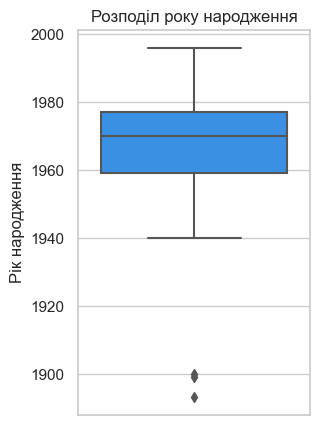

In [22]:
sns.set(style="whitegrid")  
plt.figure(figsize=(3, 5))  # розмір графіку

# Побудова вертикальної ящикової діаграми
sns.boxplot(y=df_copy['Year_Birth'], color='dodgerblue')

# Додавання налаштувань для графіку
plt.title('Розподіл року народження')
plt.ylabel('Рік народження')

# Відображення графіку
plt.show()

In [23]:
df_copy.Year_Birth.describe()

count    2236.000000
mean     1968.796512
std        11.980604
min      1893.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: Year_Birth, dtype: float64

 ##### Є значення 1893 року та близько початку 1900. Візьмемо максимальний вік користувача 100 років и всі значення до 1920 року видалимо. Можливо це помилки при введенні даних. 

In [24]:
df_copy = df_copy[df_copy['Year_Birth'] >= 1920]
df_copy.Year_Birth.describe()

count    2233.000000
mean     1968.892521
std        11.697927
min      1940.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: Year_Birth, dtype: float64

 ##### Після видалення мінімальне значення - це 1940 рік
 

### 2) Розглянемо детально викиди стовпця "Income" та дозаповнимо його даними

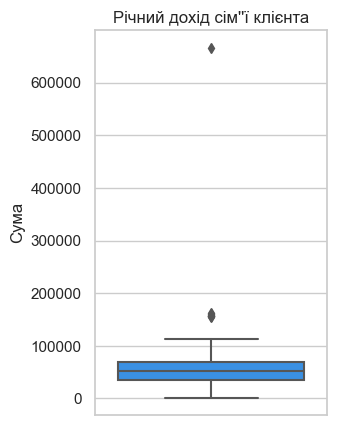

In [25]:
sns.set(style="whitegrid")  
plt.figure(figsize=(3, 5))
sns.boxplot(y=df_copy['Income'], color='dodgerblue')
plt.title("Річний дохід сім''ї клієнта")
plt.ylabel('Сума')
plt.show()

In [26]:
df_copy.Income.describe()

count      2209.000000
mean      52221.801720
std       25193.001847
min        1730.000000
25%       35196.000000
50%       51373.000000
75%       68487.000000
max      666666.000000
Name: Income, dtype: float64

 ##### У стовпці "Income" є викиди.
 ##### Стандартне відхилення (std) - 25043.27. Велике стандартне відхилення свідчить про значну дисперсію або розкид значень відносно середнього значення.
 ##### Є велике стандартне відхилення та велика різниця між медіаною та середнім. Враховуючи, що є значні відхилення вище медіани, медіана є кращим вибором для заповнення порожніх значень, оскільки вона менше чутлива до викидів і аномальних значень.

#### Заповнимо пусті значення у стовпця "Income" медіанними

In [27]:
df_copy['Income'] = df_copy['Income'].fillna(df_copy['Income'].median())

#### Перевіримо відсутність порожніх значень у стовпці "Income"

In [28]:
print("Кількість порожніх значень у стовпці 'Income':", df_copy['Income'].isna().sum())

Кількість порожніх значень у стовпці 'Income': 0


##### Результат: стовпець "Income" не має порожніх значень

#### Видалення викидів стовпця "Income "

Для знаходження викидів використаємо метод міжквартильного розмаху (IQR) для ідентифікації викидів в стовпці "Income"

In [29]:
# Обчислюємо квартилі та міжквартильний розмах для стовпця "Income"
Q1 = df_copy['Income'].quantile(0.25)  # Перший квартиль (25%)
Q3 = df_copy['Income'].quantile(0.75)  # Третій квартиль (75%)
IQR = Q3 - Q1  # Міжквартильний розмах

outliers = df_copy[(df_copy['Income'] < (Q1 - 1.5 * IQR)) | (df_copy['Income'] > (Q3 + 1.5 * IQR))]

print("Кількість викидів у стовпці 'Income':", len(outliers))

Кількість викидів у стовпці 'Income': 8


#### Видалення викидів

In [30]:
df_copy = df_copy[~((df_copy['Income'] < (Q1 - 1.5 * IQR)) | (df_copy['Income'] > (Q3 + 1.5 * IQR)))]

In [31]:
df_copy.Income.describe()

count      2225.000000
mean      51603.629663
std       20609.087765
min        1730.000000
25%       35388.000000
50%       51373.000000
75%       68118.000000
max      113734.000000
Name: Income, dtype: float64

### 3) Розглянемо детально викиди стовпця "Total_Mnt"

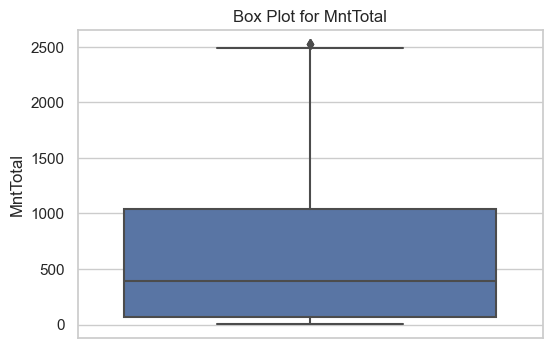

In [32]:
plt.figure(figsize=(6, 4))  
sns.boxplot(data=df_copy, y='Total_Mnt')
plt.title('Box Plot for MntTotal')
plt.ylabel('MntTotal')
plt.show()

In [33]:
df_copy.Total_Mnt.describe()

count    2225.000000
mean      605.176629
std       601.289750
min         5.000000
25%        69.000000
50%       396.000000
75%      1043.000000
max      2525.000000
Name: Total_Mnt, dtype: float64

In [34]:
# Обчислюємо квартилі та міжквартильний розмах для стовпця "Total_Mnt"
Q1_total_mnt = df_copy['Total_Mnt'].quantile(0.25)  # Перший квартиль (25%)
Q3_total_mnt = df_copy['Total_Mnt'].quantile(0.75)  # Третій квартиль (75%)
IQR_total_mnt = Q3_total_mnt - Q1_total_mnt  # Міжквартильний розмах

# Визначаємо викиди для стовпця "Total_Mnt"
outliers_total_mnt = df_copy[(df_copy['Total_Mnt'] < (Q1_total_mnt - 1.5 * IQR_total_mnt)) | (df_copy['Total_Mnt'] > (Q3_total_mnt + 1.5 * IQR_total_mnt))]

print("Кількість викидів у стовпці 'Total_Mnt':", len(outliers_total_mnt))

Кількість викидів у стовпці 'Total_Mnt': 3


#### Видалення викидів

In [35]:
df_copy = df_copy[~((df_copy['Total_Mnt'] < (Q1_total_mnt - 1.5 * IQR_total_mnt)) | (df_copy['Total_Mnt'] > (Q3_total_mnt + 1.5 * IQR_total_mnt)))]

##### Результат: стовпець "Income" не має порожніх значень

### Теплова карта кореляції

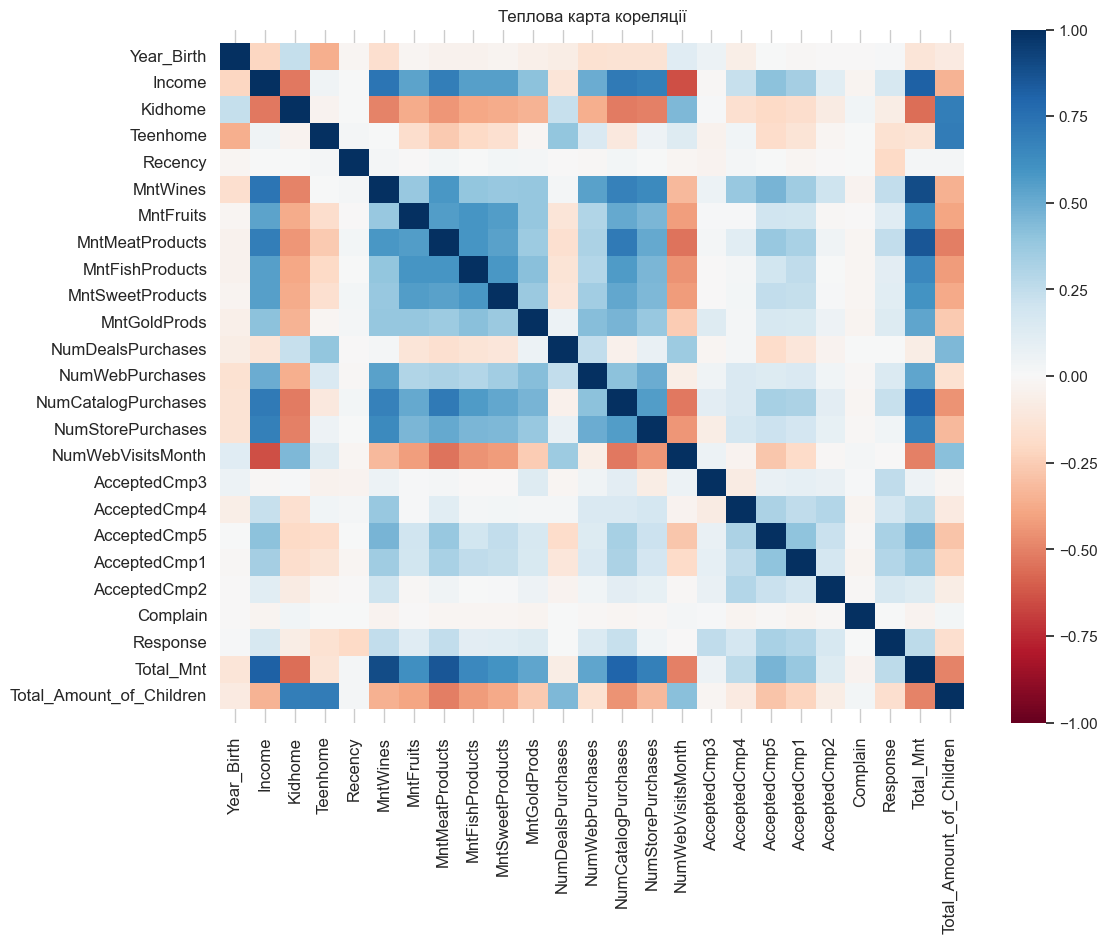

In [36]:
df_to_plot = df_copy.drop(columns=['ID'])
plt.figure(figsize = (12, 9))
s = sns.heatmap(df_to_plot.corr(),  cmap = 'RdBu',vmin = -1, vmax = 1,center = 0)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
bottom, top = s.get_ylim()
s.set_ylim(bottom + 0.5, top - 0.5)
plt.title("Теплова карта кореляції")
plt.show()

# Візуалізація даних про клієнтів


### 1. Переглянемо рік народження

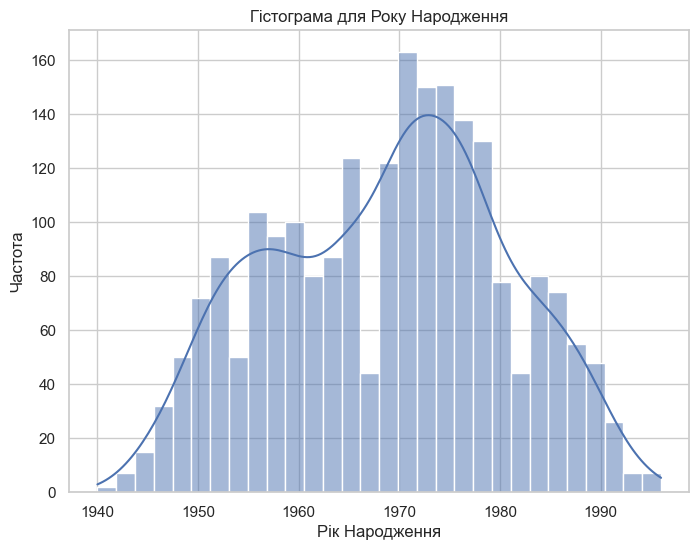

In [37]:
plt.figure(figsize=(8, 6))  
sns.histplot(data=df_copy, x='Year_Birth', bins=30, kde=True)
plt.title('Гістограма для Року Народження')
plt.xlabel('Рік Народження')
plt.ylabel('Частота')
plt.show()

##### Результат: більшість клієнтів народжені з 1970 по 1980 рік

### 2. Переглянемо кількість дітей у клієнта

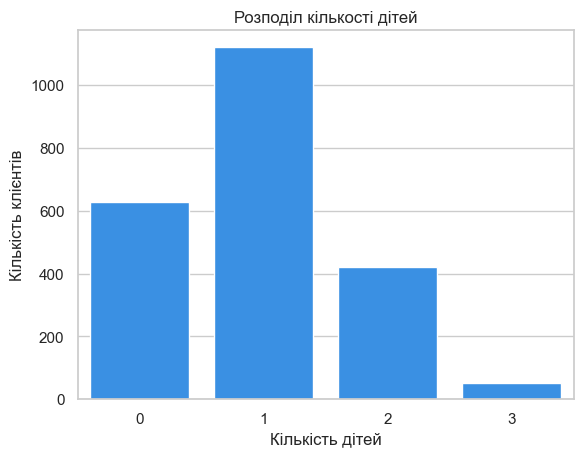

In [38]:
sns.countplot(data=df_copy, x='Total_Amount_of_Children', color='dodgerblue')
plt.title('Розподіл кількості дітей')
plt.xlabel('Кількість дітей')
plt.ylabel('Кількість клієнтів')
plt.show()

##### Результат: більшість клієнтів має 1 дитину або не мають дітей

### 3. Переглянемо дохід клієнтів

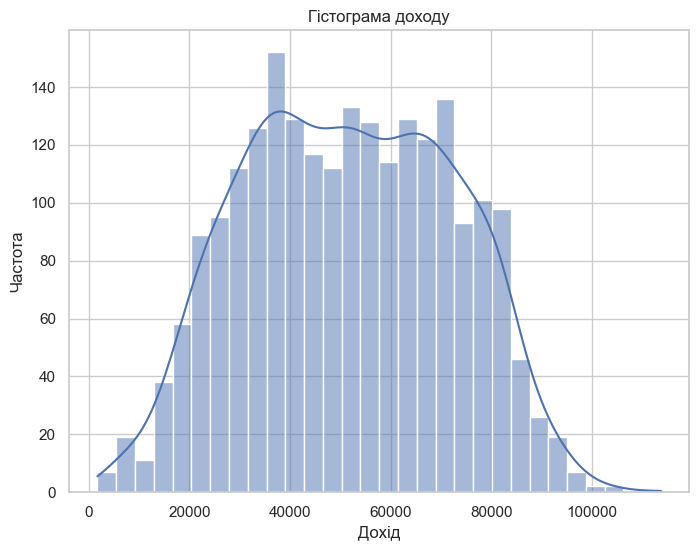

In [39]:
plt.figure(figsize=(8, 6))  
sns.histplot(data=df_copy.copy(), x='Income', bins=30, kde=True)
plt.title('Гістограма доходу')
plt.xlabel('Дохід')
plt.ylabel('Частота')
plt.show()

##### Результат: розподіл доходу близький до нормального розподілу без викидів.

#### Розподіл клієнтів за рівнем доходу

Третій квартиль: 68046.75
Перший квартиль: 35352.0
Інтерквартильний розмах (IQR): 32694.75
Мінімальне значення: 1730.0 
Максимальне значення: 113734.0


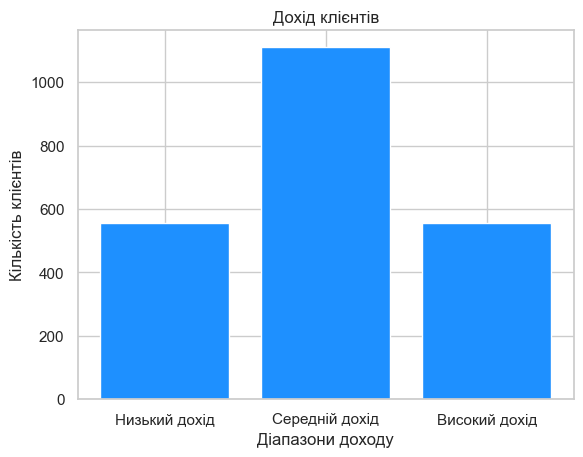

In [40]:
# Обчислюємо третій та перший квартилі стовпця "Income"
q3, q1 = np.percentile(df_copy['Income'], [75, 25])

# Відображаємо 75% квантиль
print('Третій квартиль:', q3)

# Відображаємо 25% квантиль
print('Перший квартиль:', q1)

# Обчислюємо інтерквартильний розмах (IQR) для стовпця "Income"
iqr = q3 - q1
print('Інтерквартильний розмах (IQR):', iqr)

Income_array = df_copy['Income'].values

# Діапазони доходу
income_ranges = ['Низький дохід', 'Середній дохід', 'Високий дохід']

# Визначаємо мінімальне та максимальне значення стовпця "Income"
min_income = df_copy['Income'].min()
max_income = df_copy['Income'].max()
print('Мінімальне значення:', min_income,
      '\nМаксимальне значення:', max_income)


# Розраховуємо кількість клієнтів у кожному діапазоні доходу
counts = [
    np.sum((Income_array >= min_income) & (Income_array < q1)),
    np.sum((Income_array >= q1) & (Income_array < q3)),
    np.sum((Income_array >= q3) & (Income_array <= max_income))
]

# Будуємо графік стовпців для рівнів доходу клієнтів
plt.bar(income_ranges, counts, color="dodgerblue")
plt.xlabel('Діапазони доходу')
plt.ylabel('Кількість клієнтів')
plt.title('Дохід клієнтів')
plt.show()

##### Результат: більшість клієнтів має середній рівень доходу

### 4. Переглянемо сімейний статус

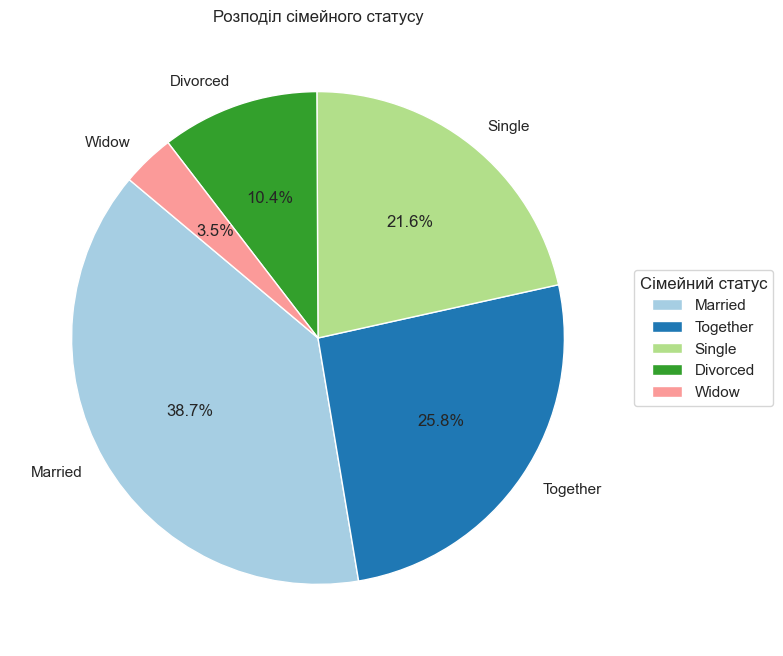

In [41]:
# Розраховуємо кількість кожного унікального значення у стовпці "Marital_Status"
marital_status_counts = df_copy['Marital_Status'].value_counts()

# Визначаємо кольори для секторів діаграми та будуємо
colors = plt.cm.Paired(range(len(marital_status_counts)))
plt.figure(figsize=(8, 8))
plt.pie(marital_status_counts, labels=marital_status_counts.index, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Розподіл сімейного статусу')

# Додавання легенди
plt.legend(title="Сімейний статус", loc="center left", bbox_to_anchor=(1, 0.5))

plt.show()

##### Результат: більшість клієнтів одружені або у відносинах

### 5. Переглянемо рівень освіти

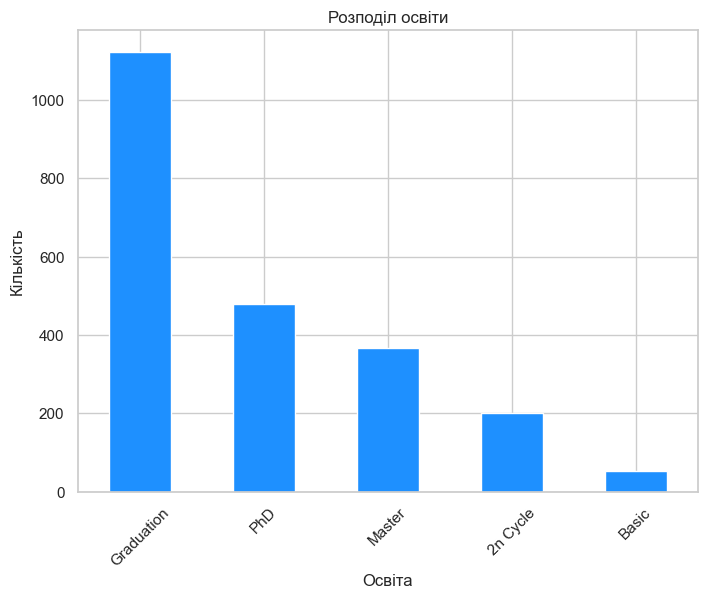

In [42]:
# Розраховуємо кількість кожного унікального значення в стовпці "Education"
education_counts = df_copy['Education'].value_counts()

# Створюємо стовпчасту діаграму
plt.figure(figsize=(8, 6))
education_counts.plot(kind='bar', color="dodgerblue")
plt.xlabel('Освіта')
plt.ylabel('Кількість')
plt.title('Розподіл освіти')
plt.xticks(rotation=45)
plt.show()


##### Результат: більшість клієнтів мають рівеь "Випускник"

### 5. Переглянемо чи скаржились клієнти

<Axes: ylabel='Complain'>

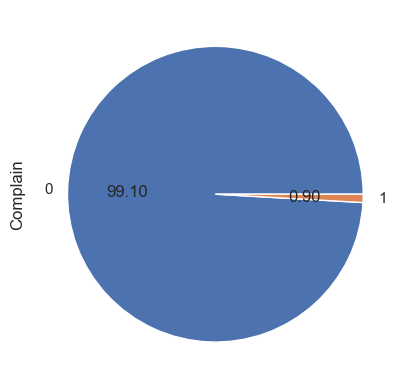

In [43]:
df_copy['Complain'].value_counts().plot(kind='pie',autopct='%.2f')

##### Результат: 99% не скаржились протягом 2 років

### Візуалізація даних про товари

#### Найчастіше купляємі продукти

In [44]:
mnt_cols = [col for col in df_copy.columns if 'Mnt' in col]

spending = pd.DataFrame(round(df_copy[mnt_cols].mean(), 1), columns=['Average']).sort_values(by='Average').reset_index()
spending


,index,Average
0,MntFruits,26.2
1,MntSweetProducts,27.0
2,MntFishProducts,37.4
3,MntGoldProds,43.9
4,MntMeatProducts,164.3
5,MntWines,303.7
6,Total_Mnt,602.6


#####  Найбіль купуємим продуктом компанії є вино, за яким слідує м'ясо.

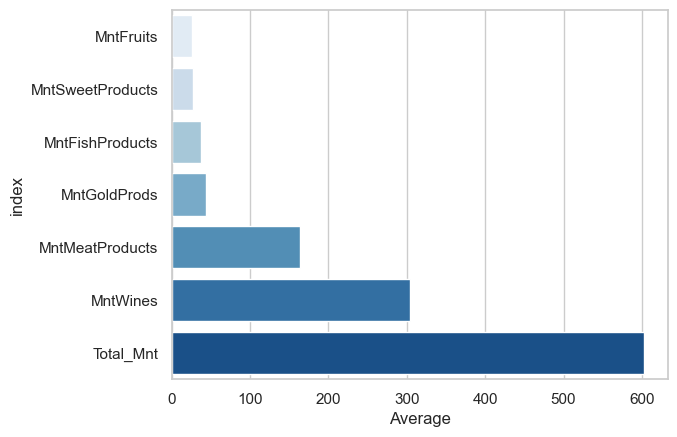

In [45]:
ax = sns.barplot(x='Average', y='index', data=spending, palette='Blues')

##### Середній покупець:
- 25-45 доларів на фрукти, солодощі, рибу та золото.
- Понад 160 доларів на м'ясо.
- Понад 300 доларів на вино.
- Разом понад 600 доларів.

### Графік кореляціїї продуктів

In [46]:
def fn(nm):
    if 'mnt' in nm.lower():
        return True
    return False

cols = df_copy.columns
mnt_cols =  list(filter(fn, cols))
mnt_cols.remove('Total_Mnt')
corr = df_copy[mnt_cols].corr()
corr.style.background_gradient(cmap='brg')

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
MntWines,1.000000,0.381640,0.582162,0.397805,0.378564,0.386071
MntFruits,0.381640,1.000000,0.557948,0.592593,0.562138,0.387540
MntMeatProducts,0.582162,0.557948,1.000000,0.590844,0.539453,0.366703
MntFishProducts,0.397805,0.592593,0.590844,1.000000,0.580732,0.415965
MntSweetProducts,0.378564,0.562138,0.539453,0.580732,1.000000,0.369108
MntGoldProds,0.386071,0.387540,0.366703,0.415965,0.369108,1.000000


Результати аналізу графіка кореляції продуктів:
- Фрукти досить корелюють з іншими продуктами (Можливо через те, що вони є продуктом щоденного вживання)
- Вино найчастіше купуть з м'ясом
- Часто рибу купують разом з м'ясом
- Солодощі та фрукти рідко купують з вином
- Золоті вироби мають найменше відношення до інших продуктів (потрібне додаткове дослідження)

### Аналіз середніх витрат на різних категоріях товарів в залежності від сімейного статусу


In [47]:
categories = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Total_Mnt']

mnts_by_marital = df_copy[['Marital_Status'] + categories].groupby(['Marital_Status'])\
    .agg({category: [np.median] for category in categories}).round(2)

mnts_by_marital.style.highlight_max(axis=0, color='salmon').highlight_min(axis=0, color='lightblue')

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Total_Mnt
,median,median,median,median,median,median,median
Marital_Status,,,,,,,
Divorced,184.000000,8.000000,72.500000,10.500000,7.000000,25.500000,410.500000
Married,173.000000,7.000000,64.000000,12.000000,8.000000,22.000000,396.000000
Single,148.500000,8.000000,62.500000,12.000000,9.000000,26.000000,352.000000
Together,186.500000,8.000000,68.000000,12.000000,9.000000,24.000000,393.500000
Widow,332.000000,12.000000,83.000000,23.000000,11.000000,38.000000,636.000000


### Кількість покупок в залежності від сімейного статусу

In [48]:
# Створюємо список категорій покупок
purchase_categories = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

# Групуємо та агрегуємо дані за статусом шлюбу
purchases_by_marital = df_copy[['Marital_Status'] + purchase_categories].groupby(['Marital_Status'])\
    .agg({category: [np.sum] for category in purchase_categories}).round(2)

# Використовуємо стилі для виділення максимальних та мінімальних значень
purchases_by_marital.style.highlight_max(axis=0, color='salmon').highlight_min(axis=0, color='lightblue')

,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
,sum,sum,sum,sum,sum
Marital_Status,,,,,
Divorced,564,998,619,1348,1268
Married,2037,3532,2218,5054,4635
Single,1031,1867,1242,2697,2549
Together,1342,2352,1506,3308,3037
Widow,180,356,256,494,376


Результати аналізу:
- Максимальну кількість покупок роблять одружені люди
- Вдовці/вдови купують товари рідко, але у великій кількості
- Люди без пари найменше за всіх роблять покупки

Одружені люди можуть бути цільовою аудиторією та мати більше шансів на конверсію.

### Співвідношення витрат до наявності дітей

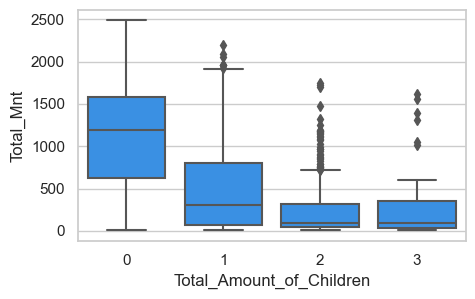

In [49]:
plt.figure(figsize=(5,3))
sns.boxplot(data=df_copy, x='Total_Amount_of_Children', y='Total_Mnt', color='dodgerblue')
plt.xlabel('Total_Amount_of_Children')
plt.ylabel('Total_Mnt')
plt.show()

##### Клієнти, які мають дітей, витрачають менше в порівнянні з клієнтами без дітей. Зі збільшенням кількості дітей середні витрати клієнтів зменшуються.

### Співвідношення витрат до наявності дітей

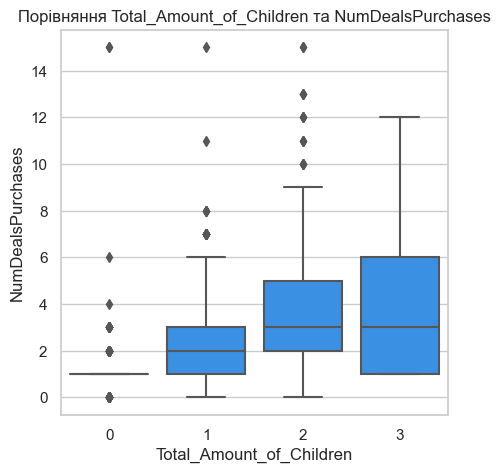

In [50]:
plt.figure(figsize=(5, 5))
sns.boxplot(data=df_copy, x='Total_Amount_of_Children', y='NumDealsPurchases', color='dodgerblue')
plt.title('Порівняння Total_Amount_of_Children та NumDealsPurchases')
plt.xlabel('Total_Amount_of_Children')
plt.ylabel('NumDealsPurchases')
plt.show()


##### Клієнів, які мають дітей, більше приваблюють акції та знижки.

### Співвідношення наявності дітей до кількості онлайн-покупок

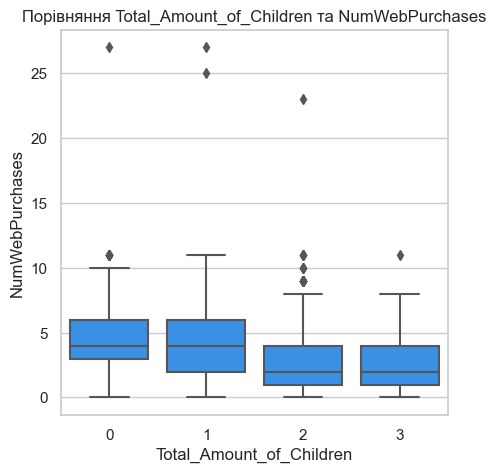

In [51]:
plt.figure(figsize=(5, 5))
sns.boxplot(data=df_copy, x='Total_Amount_of_Children', y='NumWebPurchases', color='dodgerblue')
plt.title('Порівняння Total_Amount_of_Children та NumWebPurchases')
plt.xlabel('Total_Amount_of_Children')
plt.ylabel('NumWebPurchases')
plt.show()

##### Онлайн-покупки популярні серед усіх клієнтів.

## Аналіз маркетингових кампаній

Створимо новий стовпець "AcceptedCmpOverall" на основі інших стовпців "AcceptedCmp1" до "AcceptedCmp5" і стовпця "Response".

Якщо хоча б один зі стовпців "AcceptedCmp1" до "AcceptedCmp5","Response" має значення 1, то "AcceptedCmpOverall" також має бути 1. 

В іншому випадку, якщо всі ці стовпці мають значення 0.

In [52]:
# Створимо стовпець "AcceptedCmpOverall" та встановимо значення 0
df_copy['AcceptedCmpOverall'] = 0

# Перевіримо чи прийняв клієнт пропозицію. Якшо так, то 1
df_copy['AcceptedCmpOverall'] = df_copy[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].max(axis=1)

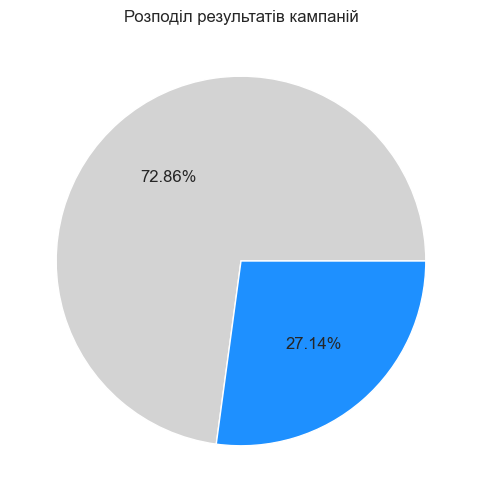

In [53]:
# Створення нового стовпця AcceptedCmpOverall на основі інших стовпців
df_copy['AcceptedCmpOverall'] = df_copy[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].max(axis=1)

# Підраховуємо кількість значень та створюємо графік
value_counts = df_copy['AcceptedCmpOverall'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(value_counts, colors=['lightgray', 'dodgerblue'], autopct='%1.2f%%')
plt.title('Розподіл результатів кампаній')
plt.show()


##### 72,86% клієнтів не прийняли пропозицію в жодній з кампаній.

### Аналіз взаємодії по каналам середньостатистичного клієнта

Створюємо новий стовпець з назвою "Total_Purchases" в нашому датафреймі. Цей стовпець представлятиме загальну кількість покупок для кожного клієнта.

In [54]:
# Total_Purchases
purchases_cols=[col for col in df_copy.columns if 'Purchases' in col]
df_copy['Total_Purchases']=df_copy[purchases_cols].sum(axis=1)

In [55]:
channel_cols = [col for col in df_copy.columns if 'Num' in col] + ['Total_Purchases', 'AcceptedCmpOverall']
channels = df_copy[channel_cols].mean().round(1).reset_index()
channels.columns = ['Channel', 'Average']
channels

,Channel,Average
0,NumDealsPurchases,2.3
1,NumWebPurchases,4.1
2,NumCatalogPurchases,2.6
3,NumStorePurchases,5.8
4,NumWebVisitsMonth,5.3
5,Total_Purchases,14.9
6,AcceptedCmpOverall,0.3


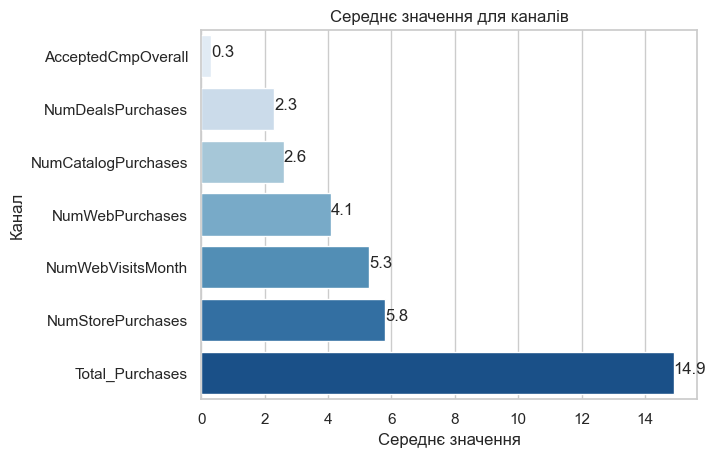

In [56]:
channels = channels.sort_values(by='Average', ascending=True)
ax = sns.barplot(x='Average', y='Channel', data=channels, palette='Blues')
ax.set(xlabel='Середнє значення', ylabel='Канал')
ax.set_title('Середнє значення для каналів')
for p in ax.patches:
    ax.annotate(f'{p.get_width():.1f}', (p.get_width(), p.get_y() + p.get_height() / 2), ha="left")
plt.show()

##### Результат:
Середньостатистичний клієнт:
- Прийняв менше 1 рекламної кампанії.
- Здійснив 2 покупки за пропозицією, 2 покупки в каталозі, 4 покупки в Інтернеті та 5 покупок в магазині.
- 14 загальних покупок
- Відвідав сайт 5 разів.

##### Згідно з даними можна зробити висновок, що магазини працюють добре. Найменш ефективні канали – це рекламні кампанії, акції та каталоги товарів.

### Визначимо найбільш успішну кампанію

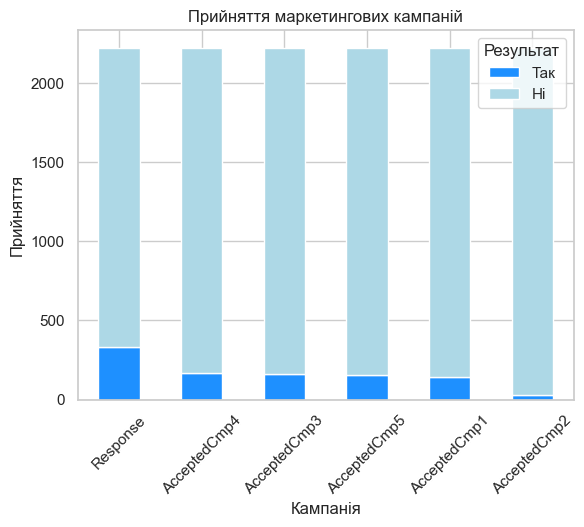

In [57]:
campaign = df_copy.loc[:,['Response','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']]

campaign = campaign.melt()
campaign = pd.crosstab(campaign["variable"], campaign["value"]).sort_values(0)

cols = list(campaign.columns)
a, b = cols.index(0), cols.index(1)
cols[b], cols[a] = cols[a], cols[b]
campaign = campaign[cols]

campaign.columns = "Так","Ні"
campaign.plot.bar(stacked=True, color=['dodgerblue', 'lightblue'])
plt.title('Прийняття маркетингових кампаній')
plt.xlabel('Кампанія')
plt.ylabel('Прийняття')
plt.legend(title='Результат',loc='upper right')
plt.xticks(rotation=45)
plt.show()

##### Результат: Остання кампанія є найбільш успішною, а друга - найменш успішною.

## Передбачення витрат на покупки на основі доходу клієнта

Мета: аналіз та моделювання зв'язку між рівнем доходу споживачів і сумою витрат на покупки (Total_Mnt)

### Побудова та оцінка лінійної регресійної моделі для встановлення зв'язку між доходом (Income) і загальними витратами на покупки (MntTotal).

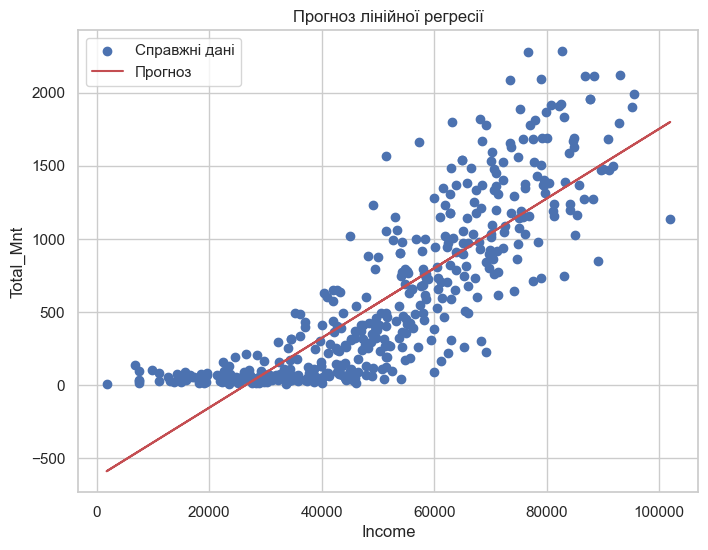

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split  # Додано імпорт
import matplotlib.pyplot as plt

# Розділити дані на навчальний і тестовий набір
X_train, X_test, y_train, y_test = train_test_split(df_copy[['Income']], df_copy[['Total_Mnt']], test_size=0.2, random_state=42)

# Створити модель лінійної регресії
model = LinearRegression()

# Підгонка моделі до даних навчання
model.fit(X_train, y_train)

# Зробити прогноз для даних тестування
y_pred = model.predict(X_test)

# Побудова графіка
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='b', label='Справжні дані')
plt.plot(X_test, y_pred, color='r', label='Прогноз')
plt.title('Прогноз лінійної регресії')
plt.xlabel('Income')
plt.ylabel('Total_Mnt')
plt.legend()
plt.show()

In [59]:
from sklearn.metrics import r2_score

# Розрахунок R2 значення для прогнозів та фактичних даних
r2 = r2_score(y_test, y_pred)
print(f'R-squared (R2) значення: {r2}')

R-squared (R2) значення: 0.7011510152129795


##### R2 значення дорівнює приблизно 0.7011. Це вказує на те, що модель лінійної регресії досить добре пояснює варіацію в даних і має високу точність в прогнозуванні.

### Побудова та оцінка поліноміальної регресійної моделі для встановлення зв'язку між доходом (Income) і загальними витратами на покупки (MntTotal).

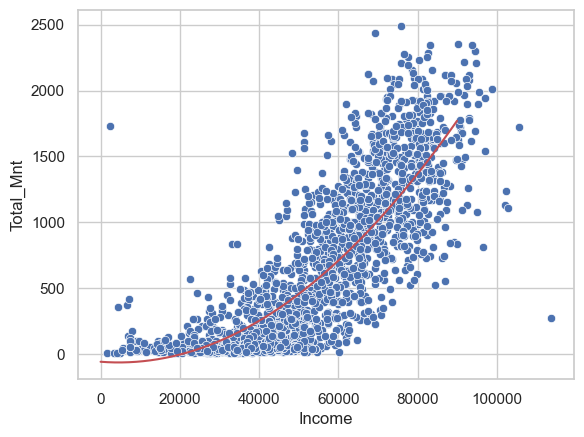

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

# Для побудови та оцінки моделі розділимо дані на тренувальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(df_copy[['Income']], df_copy[['Total_Mnt']], test_size=0.2, random_state=42)

# Cтворимо поліноміальні функції з рівнем доходу (Income)
# Це дає можливість застосувати поліноміальну регресію до даних для знаходження зв'язку, який може бути складнішим, ніж лінійний
poly = PolynomialFeatures(degree=2)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# використовуємо лінійну регресійну модель з поліноміальними функціями для передбачення витрат на покупки
model = linear_model.LinearRegression()
model = model.fit(X_train_poly, y_train)
coefficient = model.coef_
intercept = model.intercept_

x_axis = np.arange(5, 90000, 100)
response = intercept + coefficient[0][1] * x_axis + coefficient[0][2] * x_axis**2

# Побудова діаграми розсіювання для візуалізації даних
sns.scatterplot(data=df_copy, x='Income', y='Total_Mnt', color='b')
plt.plot(x_axis, response, color='r')
plt.show()


In [61]:
from sklearn.metrics import r2_score

prediction = model.predict(X_test_poly)
r2 = r2_score(y_test, prediction)
print("R-squared (R2) значення:", r2)

R-squared (R2) значення: 0.7431121954174025


##### R2 значення дорівнює приблизно 0.7431. Це вказує на те, що поліноміальна регресійної модель дає ще більшу високу точність в прогнозуванні.

##### Можна зробити висновок, що чим більше дохід клієнта - тим більше він витрачає. Тому важливо залучати людей з високим доходом та вище середнього.

<p style="font-size: 20px">
Висновки:

- 72.86% клієнтів не приймали жодну з пропозицій у рамках рекламних кампаній.
- Найкраще продаваним продуктом компанії є вино, за яким слідує м'ясо.
- Найкращими каналами продажу є магазини.
- Найгіршими каналами продажу є рекламні кампанії, що свідчить про їхню неефективність.
- Остання кампанія є найуспішнішою, а друга - найменш успішною кампанією.
- Люди з більшим доходом витрачають більше і тому важливо залучати людей з високим доходом та вище середнього.
- Клієнти з дітьми витрачають менше грошей на продукти порівняно з тими, у кого дітей немає, що може свідчити про те, що клієнти з дітьми більше економлять.
- 99% клієнтів не скаржилися за останні два роки.
    
Рекомендації:

- Необхідно аналізувати та оптимізувати рекламні кампанії, оскільки більшість клієнтів не приймають пропозиції.
- Для залучення клієнтів з дітьми можна розглянути створення спеціальних пропозицій або рекламних акцій, які б привернули цю аудиторію.
- Компанія може намагатися збільшити кількість покупців, які очікують знижок, шляхом запуску акційних кампаній зі знижками.
- Оскільки майже всі клієнти не скаржилися за останні два роки, важливо підтримувати високу якість обслуговування та уникати ситуацій, що можуть спричинити скарги.
<p>